In [1]:
import numpy as np
import pandas as pd

In [2]:
trainDf = pd.read_csv('./train.csv')

In [3]:
labels = trainDf['label'].values

In [22]:
X = trainDf.iloc[:,1:].values

In [23]:
X.shape

(42000, 784)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
yTrain, yTest, xTrain, xTest = train_test_split(labels, X, test_size = 0.3, random_state=0)

In [8]:
from collections import Counter

In [9]:
Counter(yTrain)

Counter({0: 2890,
         1: 3255,
         9: 2969,
         7: 3067,
         8: 2859,
         3: 3053,
         2: 2901,
         5: 2676,
         4: 2836,
         6: 2894})

In [45]:
from keras import Sequential
from keras.layers import Dense, Softmax, Reshape, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras.losses import MSE
from keras.utils.np_utils import to_categorical

In [55]:
model = Sequential()
model.add(Reshape((28,28,1), input_shape=(784,)))
model.add(Conv2D(filters=16, padding='Same', kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=16, padding='Same', kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, padding='Same', kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, padding='Same', kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, padding='Same', kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, padding='Same', kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, padding='Same', kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, padding='Same', kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
xTrain.shape

(29400, 784)

In [58]:
#model.fit(xTrain, to_categorical(yTrain), epochs=10, batch_size=256)
history = model.fit(X, to_categorical(labels), epochs=6, batch_size=128)

Epoch 1/6
42000/42000 [==============================] - 226s 5ms/step - loss: 0.2180 - acc: 0.9349
Epoch 2/6
42000/42000 [==============================] - 207s 5ms/step - loss: 0.0780 - acc: 0.9794
Epoch 3/6
42000/42000 [==============================] - 206s 5ms/step - loss: 0.0539 - acc: 0.9863
Epoch 4/6
42000/42000 [==============================] - 208s 5ms/step - loss: 0.0454 - acc: 0.9883
Epoch 5/6
42000/42000 [==============================] - 209s 5ms/step - loss: 0.0388 - acc: 0.9903
Epoch 6/6
42000/42000 [==============================] - 222s 5ms/step - loss: 0.0317 - acc: 0.9913


In [60]:
history = model.fit(X, to_categorical(labels), epochs=1, batch_size=128)

Epoch 1/1
42000/42000 [==============================] - 204s 5ms/step - loss: 0.0259 - acc: 0.9928


In [48]:
import matplotlib.pyplot as plt

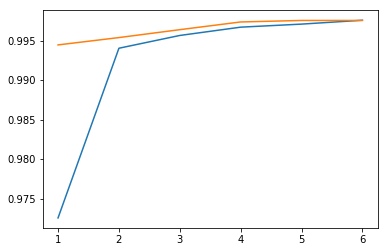

In [49]:
plt.figure()
plt.plot(range(1,7), history.history['acc'])
plt.plot(range(1,7), history.history['val_acc'])
#plt.plot(range(1,7), history.history['loss'])
#plt.plot(range(1,7), history.history['val_loss'])
plt.show()

In [29]:
testDf = pd.read_csv('test.csv')

In [64]:
X_test = testDf.values

In [65]:
Y = model.predict_classes(X_test)

In [66]:
with open('test_resultCNN2.csv', 'w') as fil:
    print('ImageId,Label', file=fil)
    for i in range(Y.shape[0]):
        print(i+1, Y[i], sep=',', file=fil)

In [9]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [10]:
K.tensorflow_backend._get_available_gpus()

[]

In [7]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))